#Preparation

In [1]:
# from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Rectangle

### Upload .csv

CSV Fields
*   SID --> Student ID,  eg. A123
*   Group --> eg. Full/ Slice
*   Scenario --> eg. Vulnerability types: Path/ DOS/ SQL/ XSS
*   DemoMX --> Demographic Metrics, eg. Skills in Java, programming experience
*   IntervMX --> Metric of your choice, eg. Number of correctly identified vulnerability
*   PercM --> Perceived metric, eg. Perceived ML accuracy, if not applicable to the experiment set value NULL

### Read data from .csv

In [2]:
data = pd.read_csv('transformed_final_table.csv')

In [3]:
MIN_DEMO1 = 1
MAX_DEMO1 = 5
MIN_DEMO2 = 1
MAX_DEMO2 = 5

In [28]:
MIN_INTERV1 = 0
MAX_INTERV1 = 1
MIN_INTERV2 = 0
MAX_INTERV2 = 470

In [29]:
MIN_PERC = 1
MAX_PERC = 5

In [50]:
GROUP_COLORS = {"L": "#3274A1", "C": '#E1812C'}

In [51]:
SCENARIO_COLORS = {'1':"blue", '2':"orange", '3':"green",'4': "red", '5':"purple", '6':"yellow"}

# Demographic Analysis

## Histograms
Distributions of data (based on groups/ scenario)

In [56]:
def produce_histogram_1(ax, data, group, groupVals, field, min, max, colors):
  if group == None:
    n, bins, patches = ax.hist(data[field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, width=0.75)
    ax.bar_label(patches, fontsize=10)
  else:
    n, bins, patches = ax.hist(data[data[group] == groupVals[0]][field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, color = colors[groupVals[0]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[1]][field], bins = np.arange(min, max+2, 1), rwidth=0.7, color = colors[groupVals[1]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[2]][field], bins = np.arange(min+0.25, max+2.25, 1), rwidth=0.7, color = colors[groupVals[2]], width=0.25)
    ax.bar_label(patches, fontsize=10)
  ax.set_xticks(np.arange(min+0.25, max+1.25, 1), np.arange(min, max+1, 1))
  ax.set_title(field)
  ax.set_xlim([min-0.5, max+1])
  return ax

def produce_histogram(ax, counts, field, colors):
    # `counts` is expected to be a Series with the index as the rating level and the values as the counts.
    # Plot the bars directly since the counts are already computed
    patches = ax.bar(counts.index, counts.values, color=colors, width=0.7)
    
    # Adding labels to each bar
    ax.bar_label(patches, fontsize=10)

    # Set the x-axis ticks to be centered for each bar
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index)
    
    # Set the title of the subplot to the field name
    ax.set_title(field)
    
    # Assuming 'min' and 'max' are the minimum and maximum rating levels (e.g., 1 to 5)
    min_rating = counts.index.min() - 0.5
    max_rating = counts.index.max() + 0.5
    ax.set_xlim([min_rating, max_rating])

    return ax

### Demographic Histogram

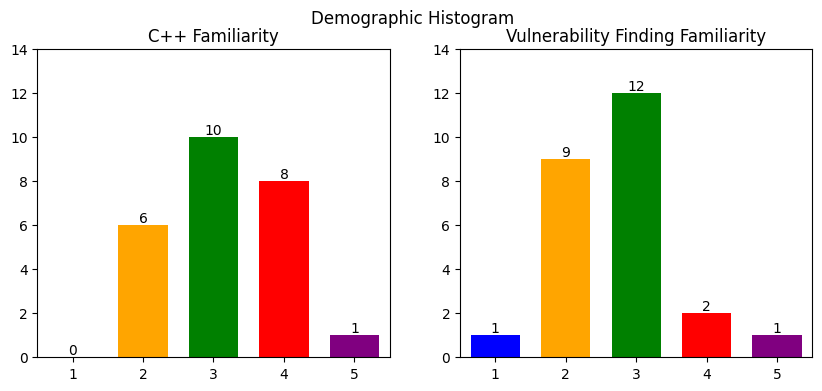

In [57]:
# Preprocess the data for the histograms to get unique counts per rating level
cpp_counts = data.groupby('C++')['SID'].nunique().reindex(range(1, 6), fill_value=0)
vul_counts = data.groupby('Vul')['SID'].nunique().reindex(range(1, 6), fill_value=0)
DEMO_COLORS = ['blue', 'orange', 'green', 'red', 'purple']
# Now calculate the adjusted maximum y-limit for the histograms
max_ylim = max(cpp_counts.max(), vul_counts.max()) + 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Assuming produce_histogram is a function that generates histograms and takes counts as input
# Update the function call if necessary to match its expected input parameters
ax1 = produce_histogram(ax1, cpp_counts, "C++ Familiarity", DEMO_COLORS)
ax1.set_ylim([0, max_ylim])

ax2 = produce_histogram(ax2, vul_counts, "Vulnerability Finding Familiarity", DEMO_COLORS)
ax2.set_ylim([0, max_ylim])

fig.suptitle("Demographic Histogram")
plt.show()



## Scatter plots
Represent values for two different numeric variables to compare the two variables.

In [58]:
def scatter_plot(ax, data, group, groupVal, colors, first, second):
  if group == None:
    data_scatter = data
    color = "blue"
  else:
    data_scatter = data[data[group] == groupVal]
    color = colors[groupVal]

  a, ca = np.unique(np.c_[data_scatter[first],data_scatter[second]], return_counts=True, axis=0)
  ax.scatter(a[:,0],a[:,1],s=ca*50, c=color)

  # if "C++" in first:
  min1 = MIN_DEMO1
  max1 = MAX_DEMO1
  # else:
  #   min1 = MIN_INTERV1
  #   max1 = MAX_INTERV1

  # if "C++" in second:
  min2 = MIN_DEMO2
  max2 = MAX_DEMO2
  # else:
  #   min2 = MIN_INTERV2
  #   max2 = MAX_INTERV2

  print(min1, max1, min2, max2)
  ax.set_xticks(np.arange(min1, max1+1,1),np.arange(min1, max1+1,1))
  ax.set_yticks(np.arange(min2, max2+1,1),np.arange(min2, max2+1,1))
  if group is not None:
    ax.set_title(group + " " + groupVal)
  return ax

### Demographic Scatter Plot

1 5 1 5


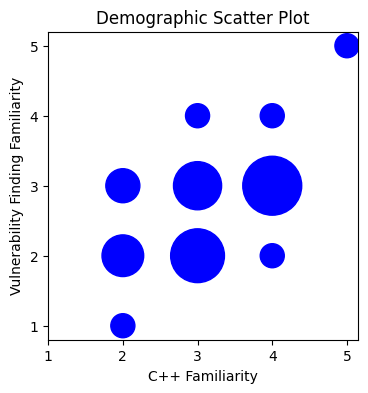

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax = scatter_plot(ax, data, None, None, GROUP_COLORS,"C++", "Vul")

ax.set_xlabel("C++ Familiarity")
ax.set_ylabel("Vulnerability Finding Familiarity")

plt.title("Demographic Scatter Plot")
plt.show()

# Intervention Metrics

## Boxplots
A standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

### Intervention Boxplot by Group

{'L': '#3274A1', 'C': '#E1812C'}


C:\Users\10474\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\10474\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


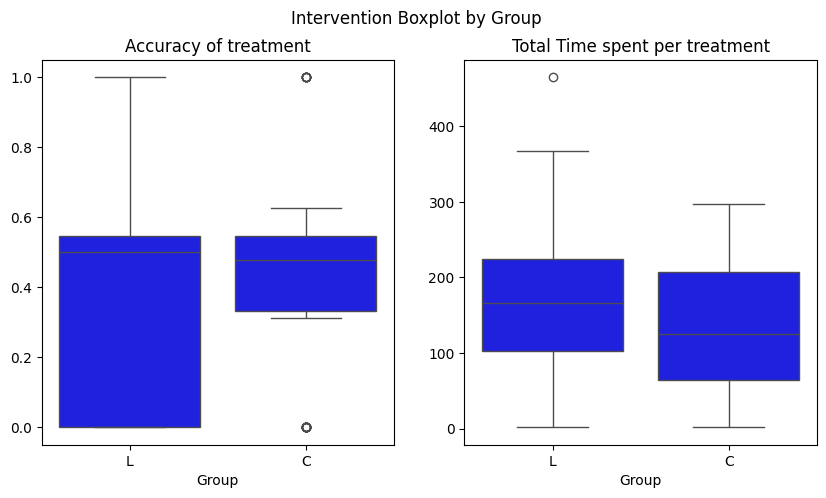

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
print(GROUP_COLORS)
sns.set_palette(palette=GROUP_COLORS.values())

sns.boxplot(x='Group', y='Accuracy', data=data, ax=axes[0])
axes[0].set_title("Accuracy of treatment")
axes[0].set_ylabel("")

sns.boxplot(x='Group', y='Time', data=data, ax=axes[1])
axes[1].set_title("Total Time spent per treatment")
axes[1].set_ylabel("")

fig.suptitle("Intervention Boxplot by Group")
plt.show()

### Intervention Boxplot by Scenario

C:\Users\10474\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\10474\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


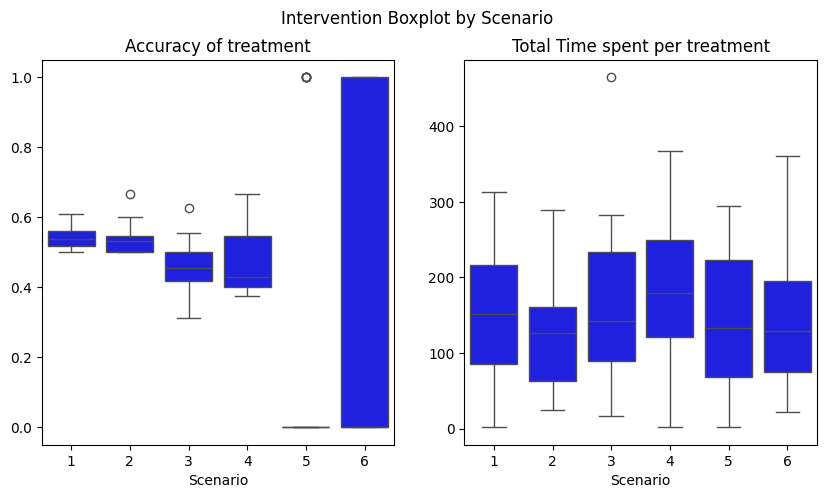

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Scenario', y='Accuracy', data=data, ax=axes[0])
axes[0].set_title("Accuracy of treatment")
axes[0].set_ylabel("")

sns.boxplot(x='Scenario', y='Time', data=data, ax=axes[1])
axes[1].set_title("Total Time spent per treatment")
axes[1].set_ylabel("")

fig.suptitle("Intervention Boxplot by Scenario")
plt.show()

## Scatter plot

### Intervention Scatter Plot by Group

0 1 0 470
0 1 0 470


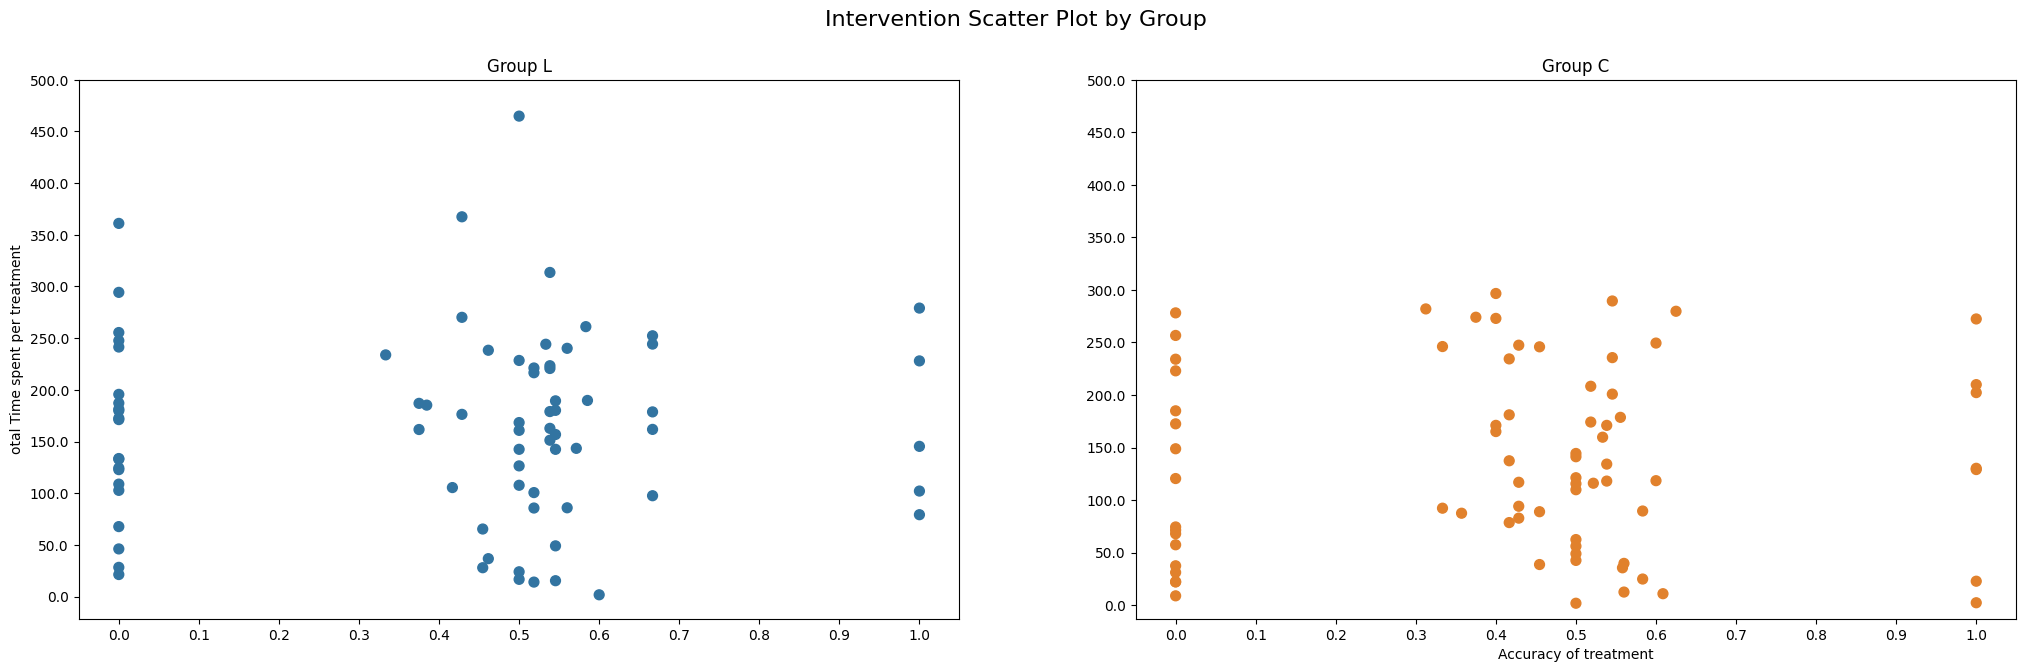

In [63]:
def scatter_plot_1(ax, data, group, groupVal, colors, first, second):
  if group == None:
    data_scatter = data
    color = "blue"
  else:
    data_scatter = data[data[group] == groupVal]
    color = colors[groupVal]

  a, ca = np.unique(np.c_[data_scatter[first],data_scatter[second]], return_counts=True, axis=0)
  ax.scatter(a[:,0],a[:,1],s=ca*50, c=color)

  # if "C++" in first:
  # min1 = MIN_DEMO1
  # max1 = MAX_DEMO1
  # else:
  min1 = MIN_INTERV1
  max1 = MAX_INTERV1

  # if "C++" in second:
  # min2 = MIN_DEMO2
  # max2 = MAX_DEMO2
  # else:
  min2 = MIN_INTERV2
  max2 = MAX_INTERV2

  print(min1, max1, min2, max2)

   # Adjust the intervals for tick marks based on the range of your data
  tick_interval_1 = 0.1  # Change this as needed for a suitable interval on the x-axis
  tick_interval_2 = 50  # Change this as needed for a suitable interval on the y-axis
  # Set the ticks for the axes
  ax.set_xticks(np.arange(min1, max1 + tick_interval_1, tick_interval_1))
  ax.set_yticks(np.arange(min2, max2 + tick_interval_2, tick_interval_2))

    # Set the labels for the axes, you can format or round them as needed
  ax.set_xticklabels([f"{x:.1f}" for x in np.arange(min1, max1 + tick_interval_1, tick_interval_1)])
  ax.set_yticklabels([f"{y:.1f}" for y in np.arange(min2, max2 + tick_interval_2, tick_interval_2)])
  if group is not None:
    ax.set_title(group + " " + groupVal)
  return ax

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

ax1 = scatter_plot_1(ax1, data, "Group", "L", GROUP_COLORS, "Accuracy", "Time")
ax2 = scatter_plot_1(ax2, data, "Group", "C", GROUP_COLORS, "Accuracy", "Time")

ax2.set_xlabel("Accuracy of treatment")
ax1.set_ylabel("otal Time spent per treatment")

fig.suptitle("Intervention Scatter Plot by Group",fontsize=16)
plt.show()

# Perception Metric

## Histograms

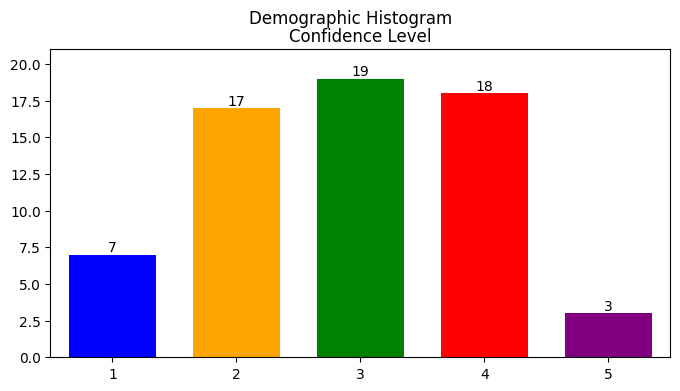

In [47]:

# Preprocess the data for the histograms to get unique counts per rating level
con_counts = data.groupby('Confidence')['SID'].nunique().reindex(range(1, 6), fill_value=0)
# Now calculate the adjusted maximum y-limit for the histograms
max_ylim = max(con_counts.max(), vul_counts.max()) + 2

fig, ax = plt.subplots(figsize=(8, 4))


ax = produce_histogram(ax, con_counts, "Confidence Level", DEMO_COLORS)
ax.set_ylim([0, max_ylim])


fig.suptitle("Demographic Histogram")
plt.show()



## Boxplots

### Perception Boxplot by Group


{'L': '#3274A1', 'C': '#E1812C'}


C:\Users\10474\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


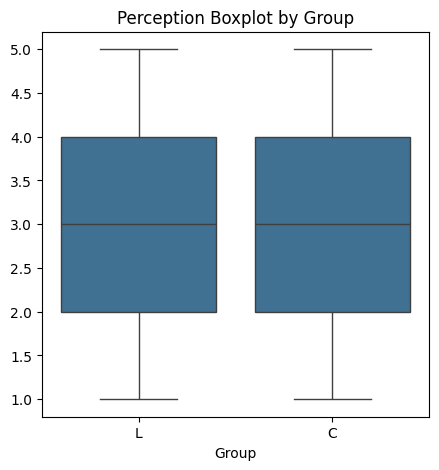

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
print(GROUP_COLORS)
sns.set_palette(palette=GROUP_COLORS.values())

sns.boxplot(x='Group', y='Confidence', data=data, ax=ax)
ax.set_title("Perception Boxplot by Group")
ax.set_ylabel("")

plt.show()

### Perception Boxplot by Scenario

C:\Users\10474\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


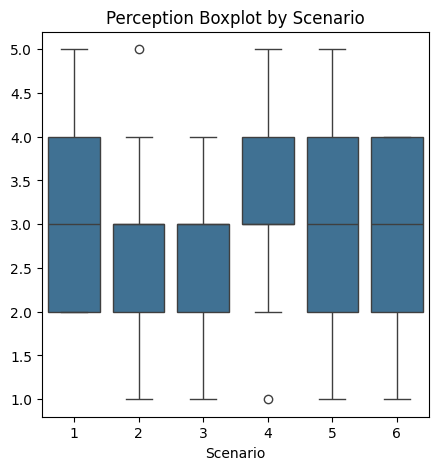

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Scenario', y='Confidence', data=data, ax=ax)
ax.set_title("Perception Boxplot by Scenario")
ax.set_ylabel("")

plt.show()

# Statistical Test

# Analyze zero vs non-zero with Chi-square and Wilcoxon

In case your metrics determine an excess of zeros we need to split the analysis in two test:


1.   A test to determine an effect by a binary distinction: zero - non zero
2.   A test to determine an effect on the non-zero part of data. Ignoring in the analysis the zeros



In [67]:
#define threshold for zero/non-zero or keep zero as the threshold
threshold_intervm1 = 0 #here your choice, it can also be zero
threshold_intervm2 = 0 #here your choice, it can also be zero

#all below threshold and equal is zero, else is non-zero
data_zero_non_zero = data.copy()
data_zero_non_zero.loc[data_zero_non_zero['Accuracy']<=threshold_intervm1,'Accuracy']=0
data_zero_non_zero.loc[data_zero_non_zero['Accuracy']>threshold_intervm1,'Accuracy']=1

data_zero_non_zero.loc[data_zero_non_zero['Time']<=threshold_intervm2,'Time']=0
data_zero_non_zero.loc[data_zero_non_zero['Time']>threshold_intervm2,'Time']=1

#chi-square test zero-non zero
contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.Accuracy)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.Time)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

Accuracy  0.0  1.0
Group             
C          17   57
L          21   55
Group x IntervM1 Chi_square value 0.21914296877506725 p value 0.6396937104291531 degrees of freedom 1
Group x IntervM2 Chi_square value 0.0 p value 1.0 degrees of freedom 0


Inspect only non-zero values using Wilcoxon

In [70]:
#ignore zero values

data_nonzero_intervm1 = data[data['Accuracy']>threshold_intervm1]
data_nonzero_intervm2 = data[data['Time']>threshold_intervm2]

from itertools import combinations

#groups do not change
group_pairs = list(combinations(data["Group"].unique(), 2))

my_groups = data_nonzero_intervm1["Group"].unique()

#A vs B
stat, p = stats.ranksums(x=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[0]]['Accuracy'], y=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[1]]['Accuracy'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('Accuracy', my_groups[0], my_groups[1],stat, p))
# #A vs C
# stat, p = stats.ranksums(x=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[0]]['Accuracy'], y=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[2]]['Accuracy'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('Accuracy', my_groups[0], my_groups[2],stat, p))

#same for intervM2
my_groups = data_nonzero_intervm2["Group"].unique()

stat, p = stats.ranksums(x=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[0]]['Time'], y=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[1]]['Time'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('Time', my_groups[0], my_groups[1],stat, p))

# stat, p = stats.ranksums(x=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[0]]['Time'], y=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[2]]['Time'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('Time', my_groups[0], my_groups[2],stat, p))

Accuracy Group L x Group C stat = 1.3066190147773384, p-value = 0.19134213546626055
Time Group L x Group C stat = 1.6990960418898953, p-value = 0.0893010890605264


## If data is ordinal, perform Wilcoxon Ranksum Tests

In case we do not have an excess of zeros we can directly apply Wilcoxon if ordinal

In [71]:
from itertools import combinations

my_groups = data["Group"].unique()

#A vs B
stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['Accuracy'], y=data[data.Group == my_groups[1]]['Accuracy'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('Accuracy', my_groups[0], my_groups[1],stat, p))
# #A vs C
# stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['IntervM1'], y=data[data.Group == my_groups[2]]['IntervM1'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[2],stat, p))

#same for intervM2
stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['Time'], y=data[data.Group == my_groups[1]]['Time'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('Time', my_groups[0], my_groups[1],stat, p))

# stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['IntervM2'], y=data[data.Group == my_groups[2]]['IntervM2'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[2],stat, p))

Accuracy Group L x Group C stat = 0.35147230070067526, p-value = 0.7252340494364766
Time Group L x Group C stat = 1.6990960418898953, p-value = 0.0893010890605264


In [72]:
from itertools import combinations

scenario_pairs = list(combinations(data["Scenario"].unique(), 2))

for pair in scenario_pairs:
  stat, p = stats.ranksums(x=data[data.Scenario == pair[0]]['Accuracy'], y=data[data.Scenario == pair[1]]['Accuracy'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('Accuracy', pair[0], pair[1],stat, p))

  stat, p = stats.ranksums(x=data[data.Scenario == pair[0]]['Time'], y=data[data.Scenario == pair[1]]['Time'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('Time', pair[0], pair[1],stat, p))

Accuracy Scenario 1 x Scenario 2 stat = 1.0380524751555051, p-value = 0.2992456253952902
Time Scenario 1 x Scenario 2 stat = 0.33954987505086615, p-value = 0.7341955313984357
Accuracy Scenario 1 x Scenario 5 stat = 3.6380343755449944, p-value = 0.0002747267638079423
Time Scenario 1 x Scenario 5 stat = -0.1649242250247064, p-value = 0.8690036246806359
Accuracy Scenario 1 x Scenario 6 stat = 2.6678918753996625, p-value = 0.007632881787792299
Time Scenario 1 x Scenario 6 stat = -0.3007441750450529, p-value = 0.7636095804436286
Accuracy Scenario 1 x Scenario 3 stat = 5.180560950776072, p-value = 2.2121962704999195e-07
Time Scenario 1 x Scenario 3 stat = -0.8440239751264388, p-value = 0.3986560083814854
Accuracy Scenario 1 x Scenario 4 stat = 2.5223705003778627, p-value = 0.011656686132397214
Time Scenario 1 x Scenario 4 stat = -1.707450800255784, p-value = 0.08773829506214073
Accuracy Scenario 2 x Scenario 5 stat = 3.6380343755449944, p-value = 0.0002747267638079423
Time Scenario 2 x Scena

## If data is binary, perform Chi-Square Test.

In case we do not have an excess of zeros we can directly apply Chi-Square if binary

In [ ]:
contingency_table = pd.crosstab(data.Group, data.IntervM1)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.Group, data.IntervM2)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.Scenario, data.IntervM1)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Scenario x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.Scenario, data.IntervM2)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Scenario x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

Group x IntervM1 Chi_square value 60.216666666666676 p value 0.020923909068502587 degrees of freedom 40
Group x IntervM2 Chi_square value 36.449999999999996 p value 0.6308498044355616 degrees of freedom 40
Scenario x IntervM1 Chi_square value 35.24285714285715 p value 0.6840872325897815 degrees of freedom 40
Scenario x IntervM2 Chi_square value 28.86666666666667 p value 0.9044083714369704 degrees of freedom 40


# [OPTIONAL] Additional analysis
This is free for students to add additional analysis and plots